<a href="https://colab.research.google.com/github/KORshinjoonghyeok/AutoTradingSystem/blob/master/keras_trading_learning_ex_1_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_csv('/content/drive/My Drive/trading data/daily/DA000020.csv')

In [ ]:
df.sort_values(by='date',inplace=True)

In [ ]:
df_stock = df.copy()

In [ ]:
df_stock['date'] = df_stock['date'].astype('str')
df_stock['date'] = pd.to_datetime(df_stock['date'])
df_stock.set_index(df_stock['date'],inplace=True)

In [ ]:
df_stock.drop('date',axis=1,inplace=True)

In [ ]:
df_stock

,time,open,high,low,close,prev,volume,tr_amount,sales_qu,purchase_qu,li_share,market_cap,fr_cu_holding,fr_cu_ratio,ad_pr_ratio,in_net_buy,up_do,up_do_ratio,deposit,st_turnover,tr_es_ratio,sign
date,,,,,,,,,,,,,,,,,,,,,,
1980-01-04,0,4700,4700,4700,4700,3650,0,0,0,0,0,0,0,0.00,6.59,0,0,0.0,0,0.0,0.0,32
1980-01-05,0,4700,4700,4700,4700,0,0,0,0,0,0,0,0,0.00,6.59,0,0,0.0,0,0.0,0.0,32
1980-01-07,0,4990,4990,4990,4990,290,120,0,0,0,0,0,0,0.00,6.59,0,0,0.0,0,0.0,0.0,32
1980-01-08,0,5290,5290,5290,5290,300,0,0,0,0,0,0,0,0.00,6.59,0,0,0.0,0,0.0,0.0,32
1980-01-09,0,5700,5740,5700,5700,410,190,0,0,0,0,0,0,0.00,6.59,0,0,0.0,0,0.0,0.0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-29,0,22000,22050,20700,21850,-150,551123,11831000000,298463,235825,27931000,610292000000,1050663,3.76,100.00,2568,0,0.0,0,0.0,0.0,53
2020-10-05,0,22200,24350,21700,24100,2250,1094057,25444000000,475953,595364,27931000,673137000000,992087,3.55,100.00,4716,0,0.0,0,0.0,0.0,50
2020-10-06,0,24100,24350,23350,23750,-350,463912,10998000000,274377,179115,27931000,663361000000,949805,3.40,100.00,-6937,0,0.0,0,0.0,0.0,53


In [ ]:
df.shape

(10941, 23)

In [ ]:
df_stock_default = df_stock[['high','low','open','close','volume']]

In [ ]:
df_stock_default

,high,low,open,close,volume
date,,,,,
1980-01-04,4700,4700,4700,4700,0
1980-01-05,4700,4700,4700,4700,0
1980-01-07,4990,4990,4990,4990,120
1980-01-08,5290,5290,5290,5290,0
1980-01-09,5740,5700,5700,5700,190
...,...,...,...,...,...
2020-09-29,22050,20700,22000,21850,551123
2020-10-05,24350,21700,22200,24100,1094057
2020-10-06,24350,23350,24100,23750,463912


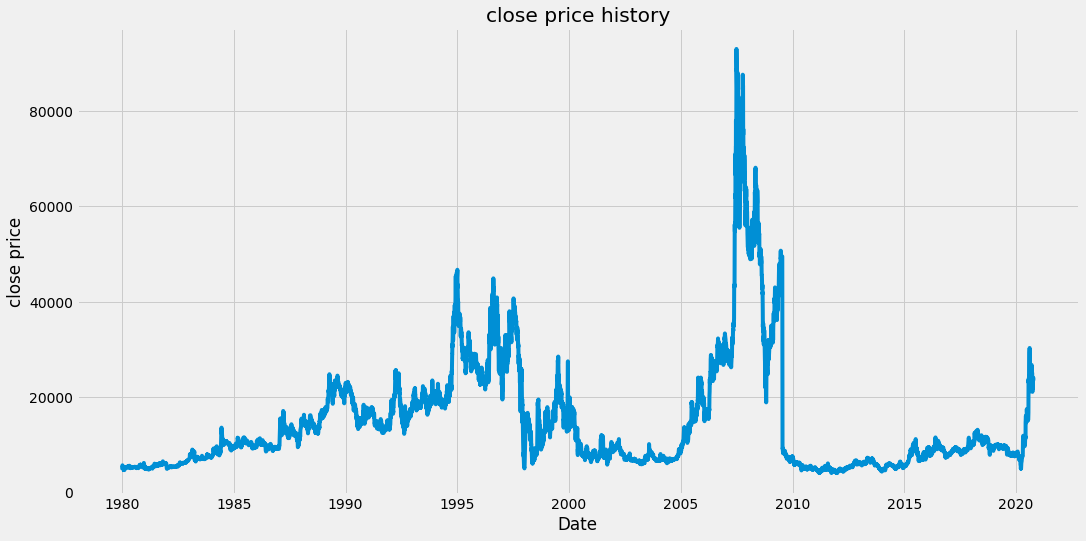

In [ ]:
plt.figure(figsize = (16,8))
plt.title('close price history')
plt.plot(df_stock_default['close'])
plt.xlabel('Date')
plt.ylabel('close price')
plt.show()

In [ ]:

data = df_stock_default.filter(['close'])


In [ ]:
data

,close
date,
1980-01-04,4700
1980-01-05,4700
1980-01-07,4990
1980-01-08,5290
1980-01-09,5700
...,...
2020-09-29,21850
2020-10-05,24100
2020-10-06,23750


In [ ]:
dataset = data.values

In [ ]:
dataset

array([[ 4700],
       [ 4700],
       [ 4990],
       ...,
       [23750],
       [23500],
       [24150]])

In [ ]:
training_data_len = math.ceil(len(dataset)*.8)

In [ ]:
training_data_len


8753

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
scaled_data

array([[0.00708422],
       [0.00708422],
       [0.01034522],
       ...,
       [0.22129765],
       [0.21848645],
       [0.22579557]])

In [ ]:
train_data = scaled_data[0:training_data_len,:]
train_data.shape

(8753, 1)

In [ ]:
x_train =[]
y_train = []
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.00708422, 0.00708422, 0.01034522, 0.01371866, 0.01832902,
       0.01832902, 0.01765433, 0.01720454, 0.01473069, 0.01371866,
       0.01326886, 0.01135725, 0.0110199 , 0.01045766, 0.01045766,
       0.01045766, 0.01045766, 0.01034522, 0.01034522, 0.01034522,
       0.00708422, 0.01045766, 0.01158214, 0.01270662, 0.01270662,
       0.01270662, 0.01045766, 0.01045766, 0.01045766, 0.01023277,
       0.00697178, 0.00730912, 0.01068256, 0.01068256, 0.01068256,
       0.01068256, 0.01068256, 0.01068256, 0.01068256, 0.01068256,
       0.01079501, 0.01079501, 0.01079501, 0.01079501, 0.01079501,
       0.01079501, 0.0138311 , 0.01371866, 0.0138311 , 0.0138311 ,
       0.0138311 , 0.0138311 , 0.0138311 , 0.0138311 , 0.0138311 ,
       0.0138311 , 0.01371866, 0.0138311 , 0.0138311 , 0.0138311 ])]
[0.013831103114809402]



In [ ]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(8693, 60, 1)

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [ ]:
model.fit(x_train,y_train,batch_size = 1,epochs = 1)

8693/8693 [==============================] - 163s 19ms/step - loss: 6.5158e-04


In [ ]:
test_data = scaled_data[training_data_len - 60:,:]
x_test = []
y_test = dataset[training_data_len:,:]

In [ ]:
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions = scaler.inverse_transform(predictions)

In [ ]:
predictions

array([[ 4857.395 ],
       [ 4843.228 ],
       [ 4820.1494],
       ...,
       [23569.19  ],
       [24204.375 ],
       [24195.21  ]], dtype=float32)

In [ ]:
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

293.4949402190214

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


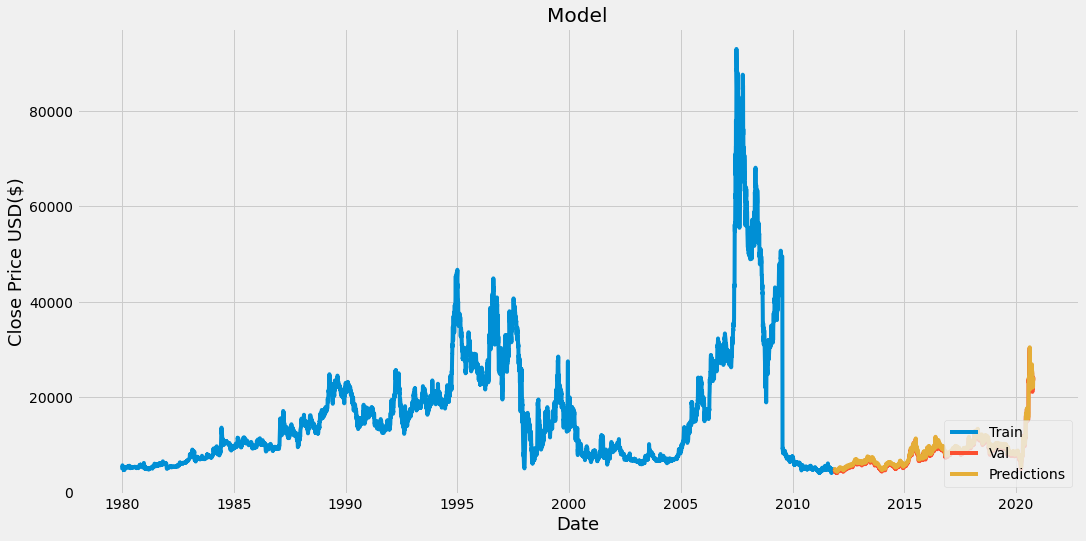

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize =(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc = 'lower right')
plt.show()

In [ ]:
valid

,close,Predictions
date,,
2011-11-18,4540,4857.395020
2011-11-21,4515,4843.228027
2011-11-22,4750,4820.149414
2011-11-23,4540,4939.050293
2011-11-24,4500,4906.017090
...,...,...
2020-09-29,21850,22109.337891
2020-10-05,24100,22173.523438
2020-10-06,23750,23569.189453


In [ ]:
df_new = df_stock_default.copy()
df_new

,high,low,open,close,volume
date,,,,,
1980-01-04,4700,4700,4700,4700,0
1980-01-05,4700,4700,4700,4700,0
1980-01-07,4990,4990,4990,4990,120
1980-01-08,5290,5290,5290,5290,0
1980-01-09,5740,5700,5700,5700,190
...,...,...,...,...,...
2020-09-29,22050,20700,22000,21850,551123
2020-10-05,24350,21700,22200,24100,1094057
2020-10-06,24350,23350,24100,23750,463912


In [ ]:
new_df = df_new.filter(['close'])
last_60 = new_df[-60:].values

In [ ]:
last_60_scaled = scaler.transform(last_60)

In [ ]:
X_test = []
X_test.append(last_60_scaled)

In [ ]:
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [ ]:
pred_price = model.predict(X_test)

In [ ]:
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[24438.248]]
